# PROJECT:California Housing Price Prediction

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Lets load the data from sklearn
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()
df=housing.data
col=housing.feature_names
dx=pd.DataFrame(df,columns=col)
dt=housing.target
dy=pd.DataFrame(dt,columns=['Price'])

In [3]:
#Lets check the first five rows of features
dx.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
#Lets check the first five rows of target
dy.head()

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [5]:
# output is conitnuos, its regression problem

In [6]:
#Lets check the shape of features
dx.shape

(20640, 8)

In [7]:
#Lets check the shape of target
dy.shape

(20640, 1)

In [8]:
#lets create a dataframe having both features and target
df=pd.concat([dx,dy],axis=1)

In [9]:
#Lets check the first five rows of complete dataframe
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
#Lets check the shape of the data
df.shape


(20640, 9)

In [11]:
# Lets check the datatypes
df.dtypes 


MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Price         float64
dtype: object

In [12]:
#Lets get more details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
Price         20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


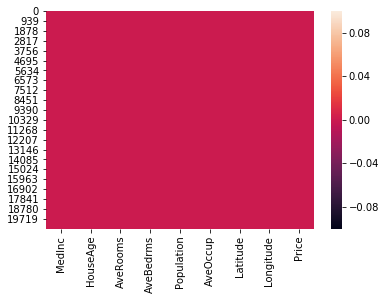

In [13]:
#lets checking the missing values Nan
sns.heatmap(df.isnull())
plt.show()


In [14]:
# Lets confirm about missing value once more
df.isnull().sum()
#Hence we are now sure there are no missing values

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [15]:
# Lets see the descriptive statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
#Lets see the correlation among the different features as well as with target
df.corr()
# we can  see there is  positive correlation of price variable with few input features while negative correlation with few others

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


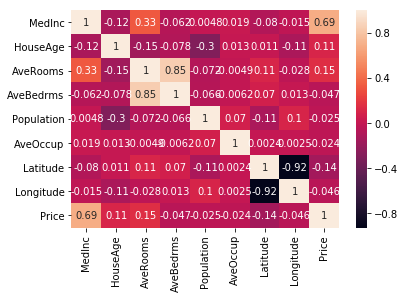

In [17]:
# lets visualize the correlation with heat map
sns.heatmap(df.corr(), annot = True)
# we can  see that highest correlation the price is having is with MedInc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E6C1069B00>,
      dtype=object)

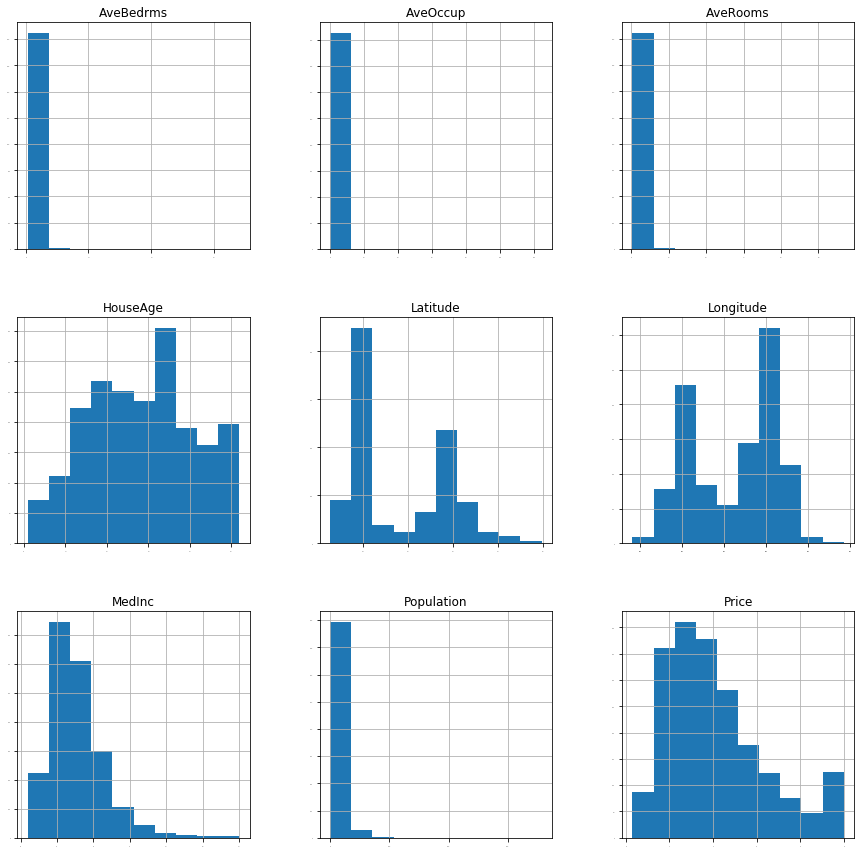

In [18]:
#Lets visualize distribution of numeric data
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,   figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E6C19C19B0>,
      dtype=object)

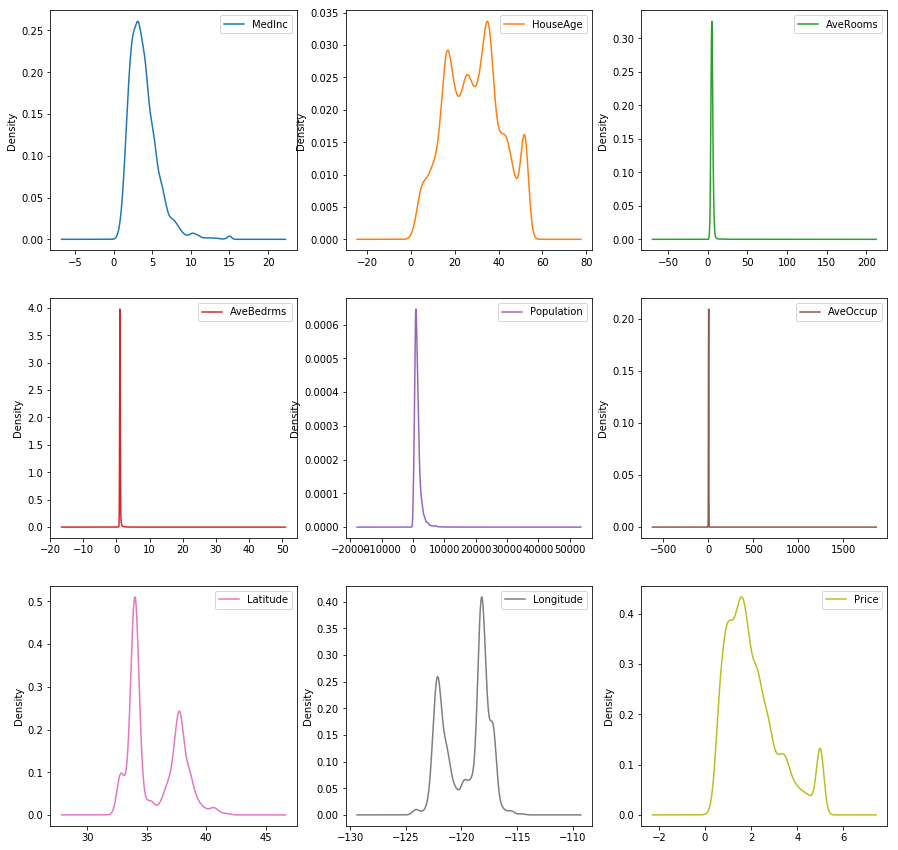

In [19]:
# # Univariate Density Plots of all numeric variables
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,15))

MedInc           AxesSubplot(0.125,0.657941;0.227941x0.222059)
HouseAge      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
AveRooms      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
AveBedrms        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Population    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
AveOccup      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Latitude            AxesSubplot(0.125,0.125;0.227941x0.222059)
Longitude        AxesSubplot(0.398529,0.125;0.227941x0.222059)
Price            AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

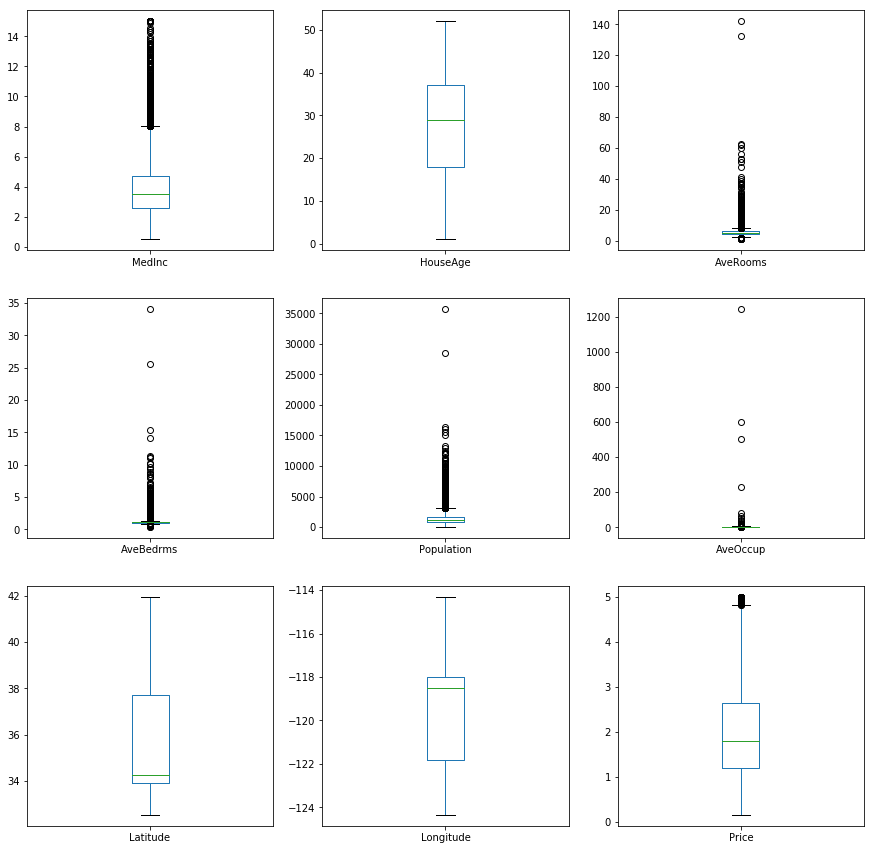

In [20]:
#Lets plot the box plot of each numeric variable
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
# we can see the outliers in MedInc, population,AveRooms and AveBedrms, we will deal later with these

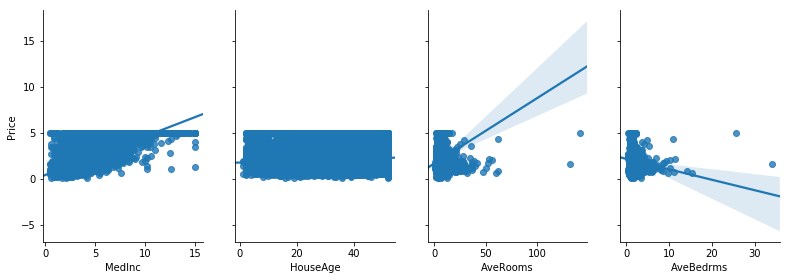

In [21]:
#Lets explore the relation of price variable with 4 continuos features  'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms'
sns.pairplot(df, x_vars=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms'], size=4, aspect=0.7, y_vars='Price',  kind='reg')


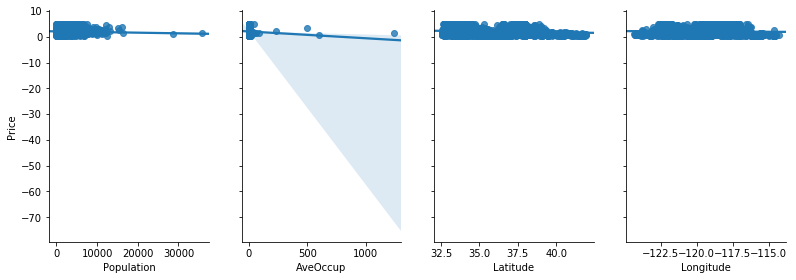

In [22]:
#Lets explore the relation of win variable with  next 4  features ''Population', 'AveOccup','Latitude', 'Longitude'
sns.pairplot(df, x_vars=['Population', 'AveOccup','Latitude', 'Longitude'], y_vars='Price', size=4, aspect=0.7, kind='reg')


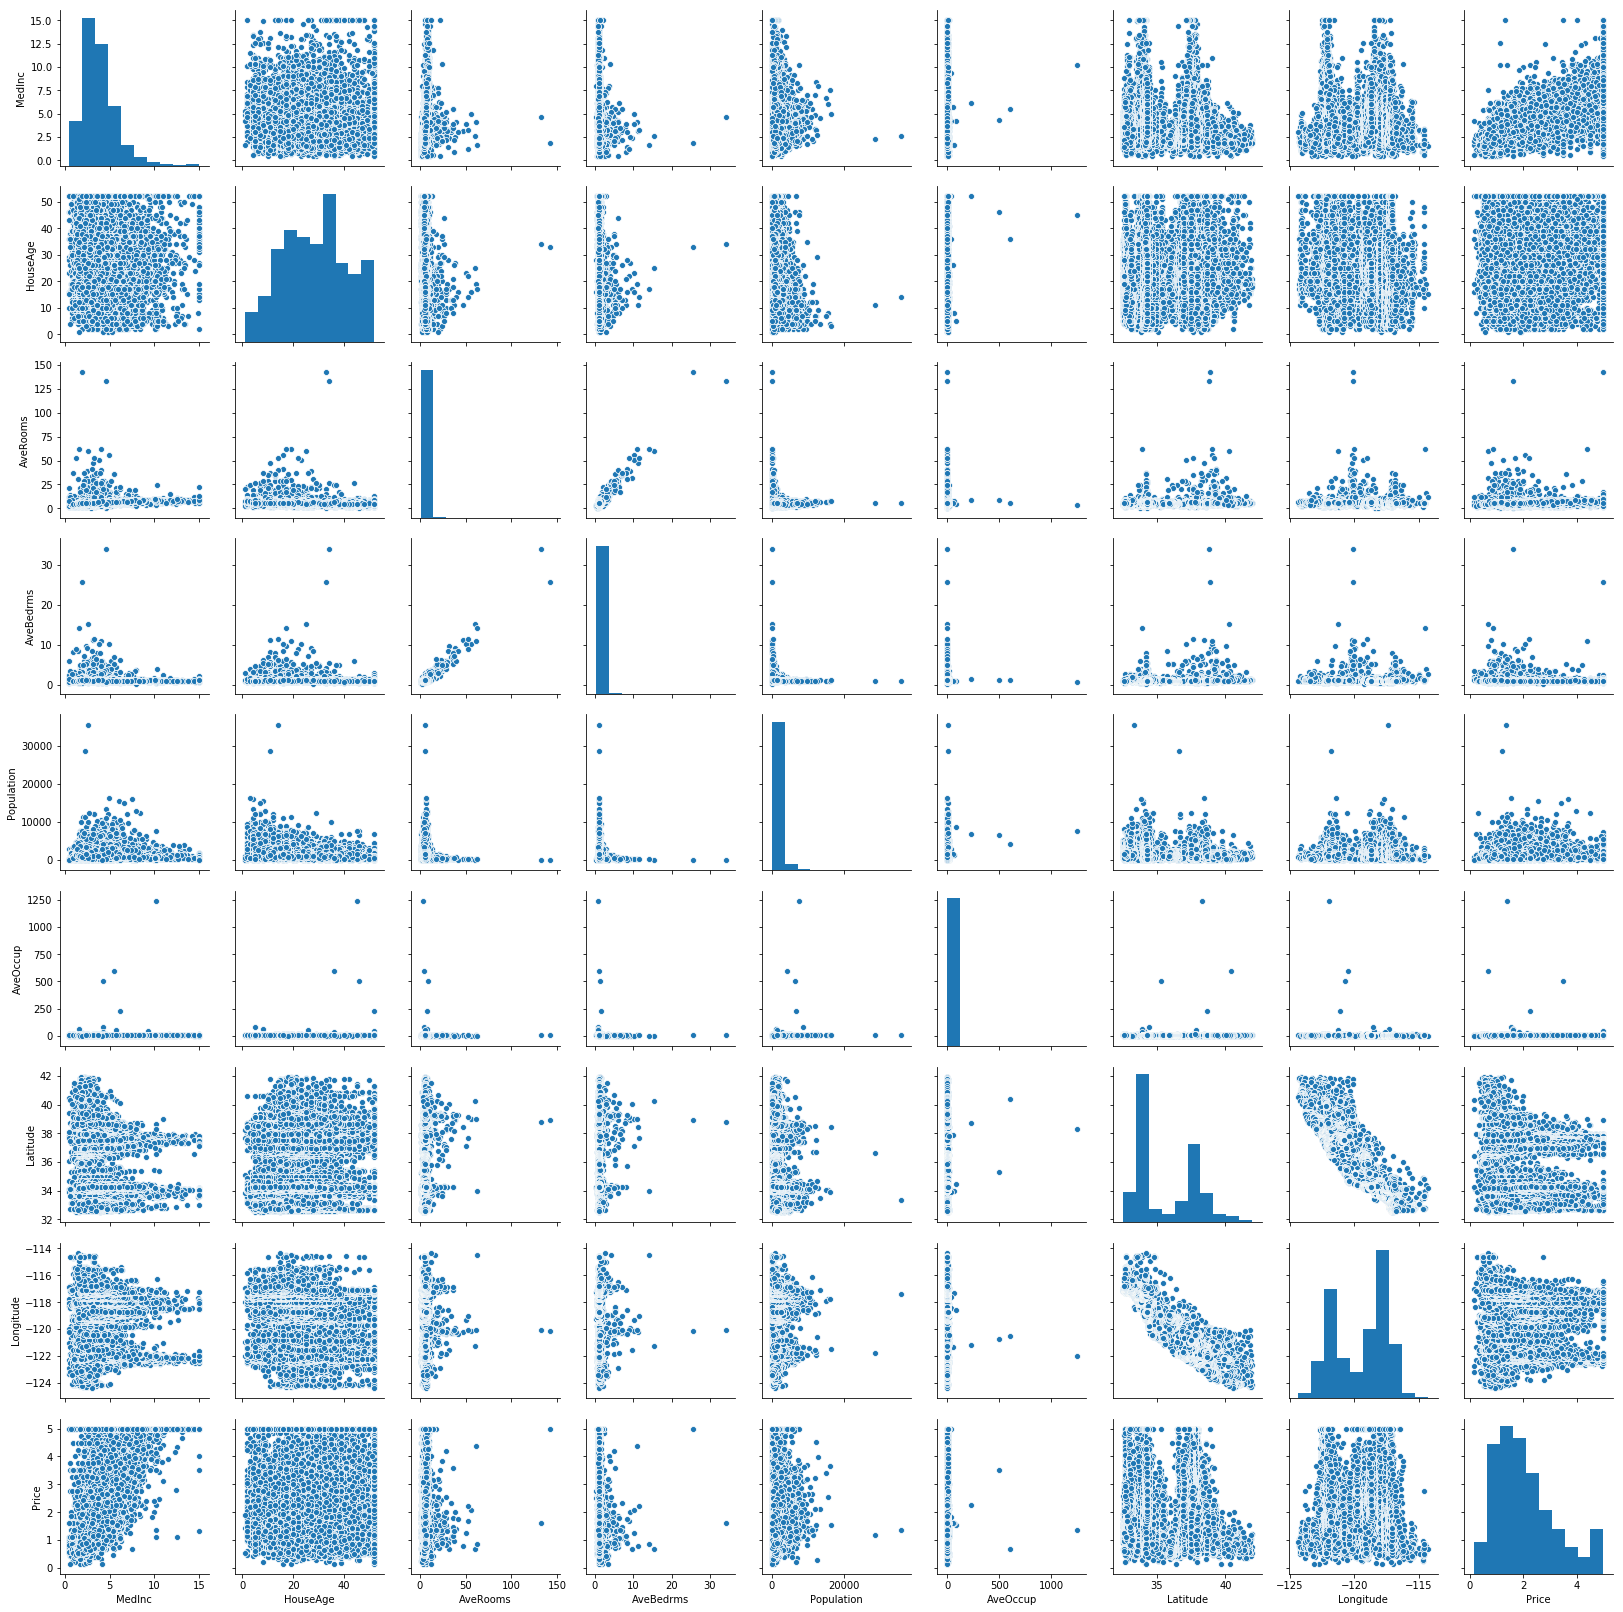

In [23]:
#Lets visualize the relation among all variables
sns.pairplot(df)

In [24]:
#Lets check the skewness of numeric data
df.skew()
#There is positive skewnewss in few variables lets remove them

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
Price          0.977763
dtype: float64

In [25]:
# Let us reduce the Skewness with log as it is postively skewed
for col in df.columns:                                      
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [26]:
#Lets check skewness in data
df.skew()
# for several variables skewness has been brought in acceptable range, except few which originally had very high skewness 


MedInc        0.226083
HouseAge      0.060331
AveRooms      1.390761
AveBedrms     8.988786
Population   -1.044087
AveOccup      3.879679
Latitude      0.465953
Longitude    -0.297801
Price         0.275939
dtype: float64

In [27]:
# Let us reduce the  ngeative Skewness
for col in df.columns:                                      
    if df.skew().loc[col]<-0.55:
        df[col]=np.power(df[col],2)

In [28]:
#Lets check the skewness again
df.skew()

MedInc        0.226083
HouseAge      0.060331
AveRooms      1.390761
AveBedrms     8.988786
Population   -0.237002
AveOccup      3.879679
Latitude      0.465953
Longitude    -0.297801
Price         0.275939
dtype: float64

In [29]:
# Lets remove the outliers if any
from scipy.stats import zscore
z_score =abs(zscore(df))
dfx = df.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', df.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
# There were few outliers which has been removed

The shape of original dataframe was = (20640, 9)
The shape of dataframe after removing outliers is = (19871, 9)


In [30]:
# Let us seperate the features and Target
x=dfx.drop(['Price'],axis=1)    
y=dfx[['Price']]

In [31]:
#lets see first 5 rows of x
x.head()
# x now contains only features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.232720,41.0,2.077455,0.704982,33.381266,1.268511,37.88,-122.23
1,2.230165,21.0,1.979364,0.678988,60.591543,1.134572,37.86,-122.22
2,2.111110,52.0,2.228738,0.729212,38.546590,1.335596,37.85,-122.24
3,1.893579,52.0,1.919471,0.729025,40.020167,1.266369,37.85,-122.25
4,1.578195,52.0,1.985385,0.732888,40.177775,1.157342,37.85,-122.25


In [32]:
#Lets check first five rows of target
y.head()
# y now contains only target variable

,Price
0,1.709464
1,1.522790
2,1.508733
3,1.484555
4,1.486592


In [33]:
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [34]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Lasso', Pipeline([('Scaler', StandardScaler()),('Lasso',Lasso(random_state=5))])))
pipelines.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge(random_state=5))])))
pipelines.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet(random_state=5))])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor(random_state=5))])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

In [35]:
#Let us check which model will perform well on the given data on the basis of mean crossval score(neg_mean_squared_error) and its std dev
results1 = []
names1 = []
for name, model in pipelines: 
    kfold1 = KFold(n_splits=10, random_state=1) 
    cv_results1 = cross_val_score(model, x, y, cv=kfold1, scoring='neg_mean_squared_error') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg)

LR: -0.039483 (0.007923)
Lasso: -0.130047 (0.035890)
Ridge: -0.039483 (0.007925)
EN: -0.130047 (0.035890)
DT: -0.067539 (0.021179)
SVR: -0.030676 (0.006819)
KNN: -0.044928 (0.013199)


In [36]:
#Let us check which model will perform well on the given data on the basis of mean crossval r2score and its std dev
results = []
names = []
for name, model in pipelines: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='r2') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.608049 (0.059369)
Lasso: -0.285629 (0.347604)
Ridge: 0.608049 (0.059383)
EN: -0.285629 (0.347604)
DT: 0.324872 (0.222782)
SVR: 0.688631 (0.087604)
KNN: 0.542770 (0.175446)


In [37]:
#lETS SEE THE COMPARISON OF ALL BASIC ALGORITHMS 
Comparison = pd.DataFrame({'ModelName':names,'R2_score': results,'NMSE':results1})
Comparison.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
5,SVR,0.688631,-0.030676
0,LR,0.608049,-0.039483
2,Ridge,0.608049,-0.039483
6,KNN,0.542770,-0.044928
4,DT,0.324872,-0.067539
1,Lasso,-0.285629,-0.130047
3,EN,-0.285629,-0.130047


In [38]:
#Lets see if ensemble technique can perform better
#lETS CREATE PIPLELINE FOR ENSEMBLE TECHNIQUE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
pipelines1 = []
pipelines1.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(random_state=5))])))
pipelines1.append(('ADC', Pipeline([('Scaler', StandardScaler()),('ADC', AdaBoostRegressor(random_state=5))])))
pipelines1.append(('GBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingRegressor(random_state=5))])))

In [39]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of NMSE

results2 = []
names2 = []
for name, model in pipelines1: 
    kfold2 = KFold(n_splits=10, random_state=1) 
    cv_results2 = cross_val_score(model, x, y, cv=kfold2, scoring='neg_mean_squared_error') 
    results2.append(cv_results2.mean()) 
    names2.append(name) 
    msg2 = "%s: %f (%f)" % (name, cv_results2.mean(), cv_results2.std())
    print(msg2)

RF: -0.039107 (0.013454)
ADC: -0.058437 (0.019135)
GBC: -0.033728 (0.008979)


In [40]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of r2 score
results3 = []
names3 = []
for name, model in pipelines1: 
    kfold3 = KFold(n_splits=10, random_state=1) 
    cv_results3 = cross_val_score(model, x, y, cv=kfold3, scoring='r2') 
    results3.append(cv_results3.mean()) 
    names3.append(name) 
    msg3 = "%s: %f (%f)" % (name, cv_results3.mean(), cv_results3.std())
    print(msg3) 

RF: 0.607212 (0.145048)
ADC: 0.425498 (0.154877)
GBC: 0.660552 (0.108442)


In [41]:
#lETS SEE THE COMPARISON SUMMARY OF ENSEMBLE TECHNIQUES
Comparison2 = pd.DataFrame({'ModelName':names2,'R2_score': results3,'NMSE':results2})
Comparison2.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
2,GBC,0.660552,-0.033728
0,RF,0.607212,-0.039107
1,ADC,0.425498,-0.058437


In [42]:
#lETS SEE THE COMPARISON OF ALL ALGORITHMS USED INCLUDING BASIC AND ENSEMBLE
final_comparison =pd.concat([Comparison,Comparison2])
final_comparison.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
5,SVR,0.688631,-0.030676
2,GBC,0.660552,-0.033728
0,LR,0.608049,-0.039483
2,Ridge,0.608049,-0.039483
0,RF,0.607212,-0.039107
6,KNN,0.542770,-0.044928
1,ADC,0.425498,-0.058437
4,DT,0.324872,-0.067539
1,Lasso,-0.285629,-0.130047
3,EN,-0.285629,-0.130047


In [46]:
# WE CAN SEE THAT AMONG ALL ALGORITHMS SVM IS PERFORMING BEST
#LETS TRY TO SEE IF ITS PERFORMANCE CAN BE IMPROVED BY TUNING ITS PARAMETERS

In [47]:
#Lets create kfold
kfoldx = KFold(n_splits=10, random_state=1)

In [48]:
#Lets try to use GRIDSEARCH ON  SVM
from sklearn.model_selection import GridSearchCV
kfoldx = KFold(n_splits=10, random_state=1)
sc = StandardScaler()
scaledx=sc.fit_transform(x)
C = [0.1,0.5, 1, 2, 3]
kernel=['rbf','linear','poly']
degree=[2,3,4]
param_grid1 = dict(C=C,kernel=kernel,degree=degree)
model1=SVR()
grid1 = GridSearchCV(estimator=model1, param_grid=param_grid1, scoring='neg_mean_squared_error', cv=kfoldx,n_jobs=-1,verbose=True)
grid_result1 = grid1.fit(scaledx, y)


Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 106.0min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 114.8min finished


In [49]:
#Lets check the best mean score
grid_result1.best_score_
# we can see there is very negligible improvement in performance
#nmse reduced from -0.030676 to0.030630

-0.030630278729991467

In [50]:
#Lets check the best parameters
grid_result1.best_params_

{'C': 0.5, 'degree': 2, 'kernel': 'rbf'}

In [51]:
#lETS CHECK AT WHICH RANDOM STATE WE WILL GET MINIMUM MSE USING BEST PARAMETERS
#Lets find out the best random state for selected SVR in terms of minimum mse 

min_mse=100
sv= SVR(C=0.5,degree=2,kernel='rbf')
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    # It is always better to scale the data after train test split to avoid leakge of information into test portion
    ss = StandardScaler()
    X_train= ss.fit_transform(X_train)
    X_test= ss.transform(X_test)
    sv.fit(X_train,y_train)
    ypreds=sv.predict(X_test)
    mse_c=mean_squared_error(y_test, ypreds)
    print('At random state ', i, 'the value of mse is ', mse_c)
    if mse_c<min_mse:
        min_mse=mse_c
        finalstate=i
print()
print()
print('minimum mse is', min_mse,'at random state' , finalstate)


At random state  1 the value of mse is  0.02497047879134415
At random state  2 the value of mse is  0.025266308109086064
At random state  3 the value of mse is  0.025722180172129315
At random state  4 the value of mse is  0.02407012455472974
At random state  5 the value of mse is  0.024606902012998907
At random state  6 the value of mse is  0.02398555291710925
At random state  7 the value of mse is  0.025262841320696998
At random state  8 the value of mse is  0.024626935347207765
At random state  9 the value of mse is  0.025260469653694263
At random state  10 the value of mse is  0.025073353814913595
At random state  11 the value of mse is  0.02468914122200335
At random state  12 the value of mse is  0.025307628273343593
At random state  13 the value of mse is  0.02353797029532849
At random state  14 the value of mse is  0.024648080946368438
At random state  15 the value of mse is  0.024822389884712904
At random state  16 the value of mse is  0.024700651841528268
At random state  17 th

In [60]:
#Lets implement the model using best selected random state
SVM = SVR(C=0.5,degree=2,kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=89)
# It is always better to scale the data after train test split to avoid leakge of information into test portion
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
SVM.fit(X_train,y_train)
ypred=SVM.predict(X_test)
mse=mean_squared_error(y_test, ypred)
mae=mean_absolute_error(y_test, ypred)
rmse =np.sqrt(mse)
r2score= r2_score(y_test, ypred)
print('The value of mse is ', mse)
print('The value of mae is ', mae)
print('The value of rmse is ', rmse)
print('The value of r2score is ', r2score)

The value of mse is  0.022342304472046468
The value of mae is  0.11150728635602083
The value of rmse is  0.14947342396575541
The value of r2score is  0.8172798485660715


In [61]:
# Lets save the predicted result to a csv file

dfx = pd.DataFrame(ypred,columns=['Predicted'])
dfx.to_csv('SVR_CALIHOUSE_prediction.csv')

In [62]:
# lETS CHECK SEE  ITS KFOLD CROSS VAL NMSE AND R2 SCORE
modelf =SVR(C=0.5,degree=2,kernel='rbf')
print('KFOLD Cross val nmse = ',cross_val_score(modelf,scaledx,y,cv=kfoldx,scoring="neg_mean_squared_error").mean())
print('KFOLD Cross val R2 = ',cross_val_score(modelf,scaledx,y,cv=kfoldx,scoring="r2").mean())

KFOLD Cross val nmse =  -0.030630275355845855
KFOLD Cross val R2 =  0.6894928564801205


In [63]:
#Lets create a  chart of performance
mydict = {'model name':['SVR'], 'KFOLD cross val r2':[0.6894],'test r2':[0.8172],'cross val nmse':[-0.0306],'test mse':[0.0223]}
score_comparison = pd.DataFrame(mydict)
score_comparison

,model name,KFOLD cross val r2,test r2,cross val nmse,test mse
0,SVR,0.6894,0.8172,-0.0306,0.0223


In [64]:
# We can clearly see model is not over fitting 
# if we require better results we require more data

In [65]:
# Lets dump our model into pkl file
from sklearn.externals import joblib
joblib.dump(SVM,'SVR_CAL_HOUSE.pkl')

['SVR_CAL_HOUSE.pkl']